### 5.CNN_finetuning_model
#### 1) model summary

In [10]:
!pip install graphviz

In [2]:
import os
import torch
from torchsummary import summary
import torchvision.models as models
import torch.nn as nn
from torchinfo import summary as summary2
from torchviz import make_dot
from torch.autograd import Variable



In [3]:
# model 구조 : AlexNet 뒤에 이진 분류를 위한 layer 추가
device = "cuda" if torch.cuda.is_available() else "cpu"
print('device', device)

model = models.alexnet(pretrained=True)
num_features = model.classifier[6].in_features
print('num_features', num_features)
model.classifier[6] = nn.Linear(num_features, 2)
model = model.to(device)


device cuda


c:\Users\82105\anaconda3\envs\R-CNN\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\82105\anaconda3\envs\R-CNN\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


num_features 4096


In [35]:
# train된 weight
chechkpoint_path = '../R-CNN/models/cnn_finetune/alexnet_car.pt'
checkpoint = torch.load(chechkpoint_path, map_location= device)
model.load_state_dict(checkpoint)


<All keys matched successfully>

In [33]:
input_parameter = next(model.parameters())
input_parameter.size()


torch.Size([64, 3, 11, 11])

In [6]:
summary(model, (3, 256,256))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 63, 63]          23,296
              ReLU-2           [-1, 64, 63, 63]               0
         MaxPool2d-3           [-1, 64, 31, 31]               0
            Conv2d-4          [-1, 192, 31, 31]         307,392
              ReLU-5          [-1, 192, 31, 31]               0
         MaxPool2d-6          [-1, 192, 15, 15]               0
            Conv2d-7          [-1, 384, 15, 15]         663,936
              ReLU-8          [-1, 384, 15, 15]               0
            Conv2d-9          [-1, 256, 15, 15]         884,992
             ReLU-10          [-1, 256, 15, 15]               0
           Conv2d-11          [-1, 256, 15, 15]         590,080
             ReLU-12          [-1, 256, 15, 15]               0
        MaxPool2d-13            [-1, 256, 7, 7]               0
AdaptiveAvgPool2d-14            [-1, 25

In [7]:
# input : [batch, channels, width, height]
summary2(model, (64, 3, 256,256))


Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [64, 2]                   --
├─Sequential: 1-1                        [64, 256, 7, 7]           --
│    └─Conv2d: 2-1                       [64, 64, 63, 63]          23,296
│    └─ReLU: 2-2                         [64, 64, 63, 63]          --
│    └─MaxPool2d: 2-3                    [64, 64, 31, 31]          --
│    └─Conv2d: 2-4                       [64, 192, 31, 31]         307,392
│    └─ReLU: 2-5                         [64, 192, 31, 31]         --
│    └─MaxPool2d: 2-6                    [64, 192, 15, 15]         --
│    └─Conv2d: 2-7                       [64, 384, 15, 15]         663,936
│    └─ReLU: 2-8                         [64, 384, 15, 15]         --
│    └─Conv2d: 2-9                       [64, 256, 15, 15]         884,992
│    └─ReLU: 2-10                        [64, 256, 15, 15]         --
│    └─Conv2d: 2-11                      [64, 256, 15, 15]        

#### 2) model result

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []

models_path = '../R-CNN/models/cnn_finetune'
for i in range(0, 25):
    
    checkpoint_file = f'alexnet_car_{i+1}.pt'
    checkpoint_path = os.path.join(models_path, checkpoint_file)
    print(checkpoint_path, (os.path.isfile(checkpoint_path)))
    
    checkpoint = torch.load(checkpoint_path, map_location= device)
    train_loss_list.append(checkpoint['train_loss'])
    val_loss_list.append(checkpoint['val_loss'])
    train_acc_list.append(checkpoint['train_acc'].cpu().numpy())
    val_acc_list.append(checkpoint['val_acc'].cpu().numpy())
    
    

../R-CNN/models/cnn_finetune\alexnet_car_1.pt True
../R-CNN/models/cnn_finetune\alexnet_car_2.pt True
../R-CNN/models/cnn_finetune\alexnet_car_3.pt True
../R-CNN/models/cnn_finetune\alexnet_car_4.pt True
../R-CNN/models/cnn_finetune\alexnet_car_5.pt True
../R-CNN/models/cnn_finetune\alexnet_car_6.pt True
../R-CNN/models/cnn_finetune\alexnet_car_7.pt True
../R-CNN/models/cnn_finetune\alexnet_car_8.pt True
../R-CNN/models/cnn_finetune\alexnet_car_9.pt True
../R-CNN/models/cnn_finetune\alexnet_car_10.pt True
../R-CNN/models/cnn_finetune\alexnet_car_11.pt True
../R-CNN/models/cnn_finetune\alexnet_car_12.pt True
../R-CNN/models/cnn_finetune\alexnet_car_13.pt True
../R-CNN/models/cnn_finetune\alexnet_car_14.pt True
../R-CNN/models/cnn_finetune\alexnet_car_15.pt True
../R-CNN/models/cnn_finetune\alexnet_car_16.pt True
../R-CNN/models/cnn_finetune\alexnet_car_17.pt True
../R-CNN/models/cnn_finetune\alexnet_car_18.pt True
../R-CNN/models/cnn_finetune\alexnet_car_19.pt True
../R-CNN/models/cnn_f

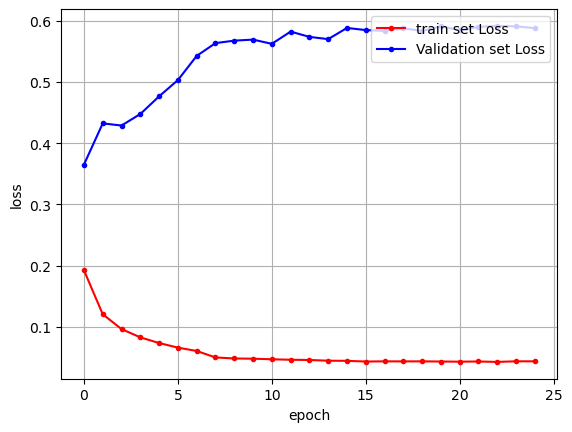

In [27]:
x_len = np.arange(len(train_loss_list))


plt.plot(x_len, train_loss_list, marker='.', c='red', label="train set Loss")
plt.plot(x_len, val_loss_list, marker='.', c='blue', label="Validation set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

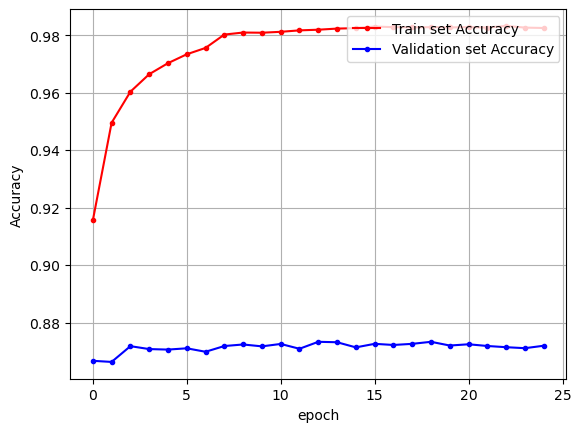

In [31]:
x_len = np.arange(len(train_loss_list))


plt.plot(x_len, train_acc_list, marker='.', c='red', label="Train set Accuracy")
plt.plot(x_len, val_acc_list, marker='.', c='blue', label="Validation set Accuracy")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()